In [1]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]

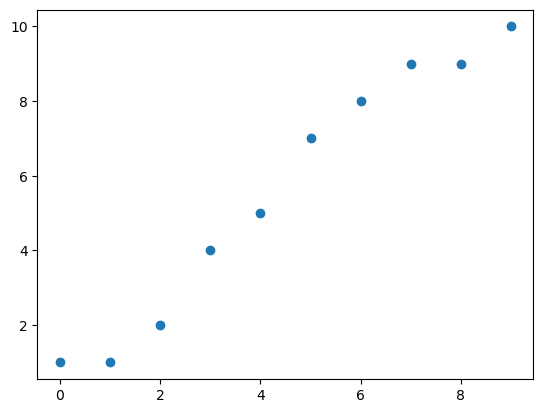

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

In [2]:
class Hypothesis:           # define hypothesis
    def __init__(self, weight):
        self.w = weight

    def forward(self, x_data):
        return self.w * x_data

In [3]:
def cost_func(estimated_y, original_y):     # define cost function: return mean-squared error
    error = 0
    for i in range(len(original_y)):
        error += (estimated_y[i] - original_y[i]) ** 2
    error /= len(original_y)
    return error

In [4]:
h = Hypothesis(4)
pred_y = [h.forward(x[i]) for i in range(len(x))]
cost_func(pred_y, y)

222.2

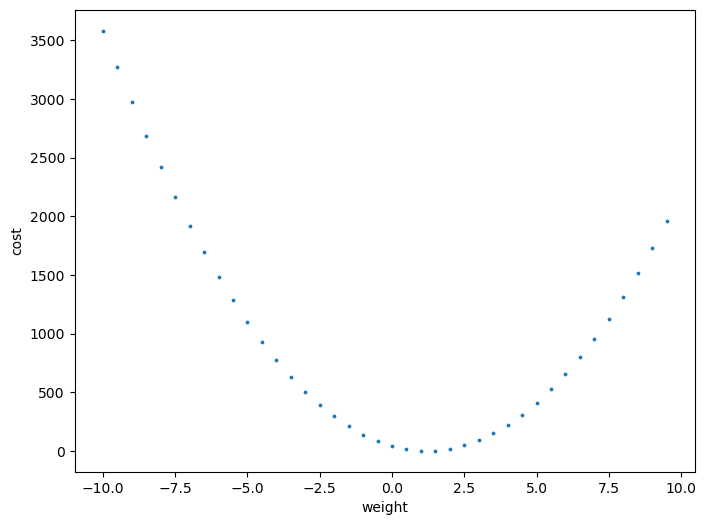

In [8]:
list_w = []; list_cost = []
for i in range(-20, 20):
    w = i * 0.5
    h = Hypothesis(w)
    pred_y = [h.forward(x[i]) for i in range(len(x))]
    c = cost_func(pred_y, y)

    list_w.append(w)
    list_cost.append(c)

plt.figure(figsize=(8, 6))
plt.xlabel('weight'); plt.ylabel('cost')
plt.scatter(list_w, list_cost, s=3)
plt.show()

In [9]:
# gradient descent
# to find w minimizing the cost

def cal_grad1(weight):
    hypothesis = Hypothesis(weight)
    estimated_y = [hypothesis.forward(x[i]) for i in range(len(x))]
    cost1 = cost_func(estimated_y, y)

    epsilon = 2 ** -15
    hypothesis = Hypothesis(weight + epsilon)
    estimated_y = [hypothesis.forward(x[i]) for i in range(len(x))]
    cost2 = cost_func(estimated_y, y)

    diff_cost = cost2 - cost1
    diff_w = epsilon

    grad = diff_cost / diff_w
    cost = (cost1 + cost2) / 2

    return grad, cost

def cal_grad2(weight):
    hypothesis = Hypothesis(weight)
    estimated_y = [hypothesis.forward(x[i]) for i in range(len(x))]

    grad = 0
    for i in range(len(x)):
        grad += 2 * (estimated_y[i] - y[i]) * x[i]

    grad /= len(x)
    cost = cost_func(estimated_y, y)
    return  grad, cost


In [10]:
print(cal_grad1(1.4))
print(cal_grad2(1.4))

(10.800869750979473, 1.4601648081932208)
(10.799999999999994, 1.459999999999999)


1.2105110570004396 0.4368421118988314 1.2105263157894737 0.43684210526315803


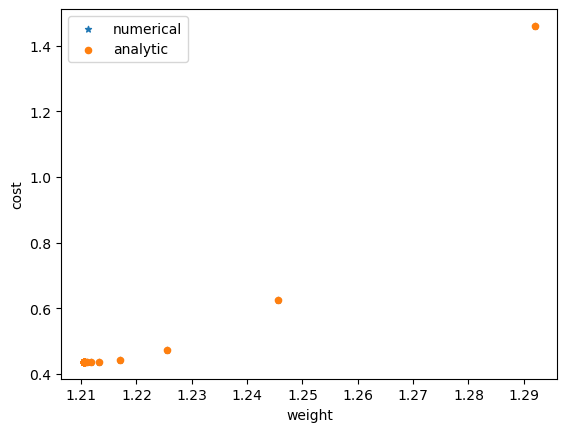

In [11]:
w1, w2 = (1.4, 1.4)
c1, c2 = (cal_grad1(w1)[1], cal_grad2(w2)[1])
lr = 0.01
list_w1 = []; list_w2 = []
list_c1 = []; list_c2 = []

num_iterations = 5000
for i in range(num_iterations):
    g1, c1 = cal_grad1(w1)
    g2, c2 = cal_grad2(w2)

    w1 += lr * (-g1)
    w2 += lr * (-g2)

    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(c1)
    list_c2.append(c2)

print(w1, c1, w2, c2)

plt.scatter(list_w1, list_c1, label='numerical', marker='*', s=20)
plt.scatter(list_w2, list_c2, label='analytic', s=20)
plt.legend()
plt.xlabel('weight'); plt.ylabel('cost')
plt.show()

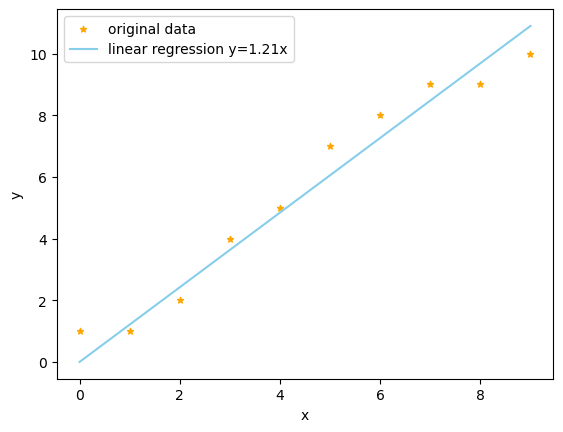

In [12]:
h = Hypothesis(w1)
pred_y = [h.forward(x[i]) for i in range(len(x))]

plt.scatter(x, y, label='original data', marker='*', s=20, color='orange')
plt.plot(x, pred_y, label=f'linear regression y={w1:.2f}x', color='skyblue')
plt.legend()
plt.xlabel('x'); plt.ylabel('y')
plt.show()